# Overview of CSE 480 Computational Theory

Adapted from the Fall 2020 version of CS 3100 Models of Computation,
taught by Professor Ganesh Gopalakrishnan of the University of Utah
School of Computing.

The Winter 2021 version of this class will heavily depend on Jove because
we believe strongly in __active learning__. Take a tour through this 
Jove User Manual and get a sense of where we will be going with the
hands-on part of this class. The theory part of this class will soon
unfold in front of you!

## A Brief Orientation Video first 

A full-screen experience is available on your own installation of Jupyter or from [this direct Youtube link](https://youtu.be/EmZdlGmwY3A). After watching it, (unless you are already on Colab), install a Colab browser extension, and click on it. This Github page will lead you to a Colab page where you can run the code.

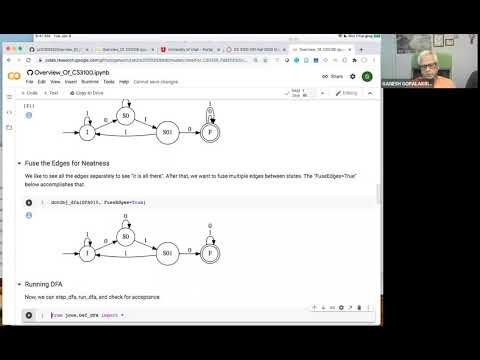

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('EmZdlGmwY3A')

# A 5-minute Tour of Jove

We will assume that you are working on Google's Colab (for your own installation, kindly follow the instructions in Jove_Installation_Guide.pdf). 

We now provide a 5-minute tour that exposes you to the essential aspects of Jove and the "import" statements you need to accomplish these.

## Workflow: Write Markdown, Convert to Machine, Draw, Run or Explore

This basic workflow of Jove consists of 

* including the minimal set of imports,
* writing a markdown and converting it to a machine,
* drawing the machine in a notebook cell, and
* running/exploring the machine.

### Minimal Imports

The import header in specific ipynb files vary; here is a minimal one that gets us going:

In [ ]:
import sys
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True  
if OWN_INSTALL:
    print("Running on own machine. Include # sys.path[0:0] = [ '..', '../3rdparty' ] .. as needed")
    sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                     '../../../..',  '../../../../3rdparty',  
                     '../../..',     '../../../3rdparty', 
                     '../..',        '../../3rdparty',
                     '..',           '../3rdparty']

else:
    ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
    sys.path.append('./Jove')       # Set paths for Colab
    sys.path.append('./Jove/jove')
# -- Now include common imports - either here, or just before when needed --

# -- these are almost always needed  
from jove.Def_md2mc  import * # -- to convert markdowns to machines
from jove.DotBashers import * # -- to draw machines

# The Full Animation Panel

This is the dandiest part of Jove IMHO. This was written by Paul C.J. Carlson who
took my class and was TA for me in CS 3100. You may even begin with this full 
animation panel and then get into the specifics discussed below, later. 

As soon as you execute the lines below, you will see tabs with legend "Edit", "Animate", and "Help". The "Edit" tab comes with ready machines to edit and run! You don't need to learn any syntax. The "Animate" tab helps you animate what you edited and created. Finally the "Help" tab tells you all the details, including the markdown syntax and the menu functions. The "Options" tab at the bottom allows you to select various properties.

This UI is one of the coolest designs within Jove. It directly ties into the core functions of Jove.

In [ ]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# Approach without using the full animation panel

It is important to use Jove without the full animation panel also. This way,
you will learn more about its interactive exploration facilities. You will
also learn how to introduce animation selectively. That is described below.

## Define and Draw Machines

Define and draw machines. 

When defining machines, please employ the __Literate Programming__ style
espoused by Prof. Donald Knuth:

* describe your design plans in clear English in comments; and
* embed your DFA code amidst these comments

We define a DFA that accepts strings that contain a 010 in this manner, below.

Note that we are overdoing the comments below, being our first illustration.
In general, you must put "just the right amount" of comments -- not excessive, not scanty.

In [ ]:
DFA010 = md2mc('''
DFA

!! Overall plans: Name states to reflect information being recorded

!! The initial state is not final, since a 010 has not been seen.
!! Thus the initial state name is "I" and not "IF"

!! Below, with each state such as I or S0, we provide both the moves out of it
!! For larger alphabets, provide all the moves in a bunch. 

!! We prefer to first list moves that are not too interesting; this way you can 
!! forget those cases and move on.

I : 1 -> I  !! Upon a '1', no progress toward 010, so throw '1' away
I : 0 -> S0 !! '0' is interesting, as it is progressing toward 010; record it in the state

S0 : 0 -> S0  !! No further progress, but progress so far is not lost either; stay at S0
S0 : 1 -> S01 !! Now progress toward 010

S01 : 1 -> I !! A "spoiler" of a '1' is seen. We revert back to I and start all over.
S01 : 0 -> F !! Seen a 010. No more work to do!

F : 0|1 -> F  !! Remain at F, having seen a 010
''')

In [ ]:
dotObj_dfa(DFA010)

### Fuse the Edges for Neatness

We like to see all the edges separately to see "it is all there". 
After that, we want to fuse multiple edges between states. The
"FuseEdges=True" below accomplishes that.

In [ ]:
dotObj_dfa(DFA010, FuseEdges=True)

### Running DFA

Now, we can step_dfa, run_dfa, and check for acceptance.

In [ ]:
from jove.Def_DFA import *

In [ ]:
accepts_dfa(DFA010, "0110010")

### Testing the DFA in Numeric Order

Testing a DFA according to strings in numeric order is a good idea,
as it ekes out bugs with respect to short strings. Usually DFAs are
"good" if they work for "all short strings" (or almost all). For this,
we include LangDef that defines "nthnumeric"

In [ ]:
from jove.LangDef import *

In [ ]:
help(nthnumeric)

In [ ]:
TestStrings = [nthnumeric(i, ['0','1']) for i in range(32)]

In [ ]:
for test in TestStrings:
    if accepts_dfa(DFA010, test):
        print("DFA010 accepts ", test)
    else:
        print("DFA010 rejects ", test)    

### Use of Filter to Pick Out All Strings Accepted

While testing as above is reassuring, it is often a good idea to pick out
the essence of a machine using the Python 'filter' command. See an example
below. You can learn about Python functions and features 
from [a good Python tutorial](https://www.python-course.eu)

In [ ]:
list(filter(lambda x: accepts_dfa(DFA010, x), TestStrings))

## Animate Individual Machines

This is how you can individually animate DFA created thus far

In [ ]:
from jove.AnimateDFA import *
AnimateDFA(DFA010, FuseEdges=False)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

### Why the "display(HTML...)" line?

The line "display(HTML...)" used in the above cell is required to make
the play/pause/stop buttons show up properly when run on Colab. 
This is based on a 
[suggestion I received from Stackoverflow](https://stackoverflow.com/questions/59595489/googles-colab-does-not-seem-to-show-the-icon-shapes-within-widgets-play)




# Details of Jove

Jove is a collection of Jupyter notebooks that includes functions to create and manipulate automata, 
including Deterministic Finite Automata (DFA), Nondeterministic Finite State Automata (NFA), Pushdown
Automata (PDA) and Turing Machines (TM). Jove also includes many features covering Derivative-based 
Pattern Matching, a Post Correspondence Problem (PCP) solution generator, a Binary Decision Diagram
tool (BDD), and facilities to experiment with Lambda Calculus.


This user manual is aimed at a beginner of Jove, and we will focus on its facilities to manipulate automata and allied notions such as regular expressions. We organize this user manual by first presenting the overall organization and philosophy of Jove. Following that, we will walk through some of the most common paths a beginner may traverse. With that in place, we believe that a more experienced user will be able to figure out the details of things we do not get into. In other words, we aim for brevity and readability of this documentation --- not encyclopaedic perfection at every juncture.



## Basics

Jove has text-based commands that can be invoked in its Read-Eval-Print Loop (REPL). We will describe those first. We will then describe animation facilities included within Jove.

###  Jove Notebook Organization

Each Jove notebook has a collection of path settings and a collection of file includes. We set it up so that Jove notebooks can run on Colab or on one's own laptop. These methods are subject to change; for now, we use these methods quite uniformly across all notebooks. The "Common Imports" area below is where we include files specific to the things we want to get done. These imports will be explained as we illustrate various examples.

### The how and why of importing
We import just what is necessary. When we import a Jove file such as "jove.LangDef" above, 
a bunch of "help(fn)" commands are advertised. This is to encourage the user to seek help
with respect to any of the functions that now become "available."

# Detailed Function Summary and Usage via Examples

We will present examples that illustrate the cool features within Jove. We will leave it to the reader to read our forthcoming paper sigcse21jove.pdf for fuller explanations (available upon request). First we walk through some cool usages of Jove features put together to achieve interesting end goals. We then list all the interesting functions one by one.

## Functions through examples

Please follow along the examples within SIGCSE.ipynb (available upon request; selective details to be included in our lessons) to understand many of Jove's functions and how they are put together. In here, you'll see how the state names tell you what Jove did in order to arrive at that state. For example, if you performed intersection or union, you'll see the compound states being separated by underscores.


## What About All the Machine Types?

The best place to study all of Jove's functions and machine types is from Appendix B of our book. This lists functions per chapter.

Another place from which to learn Jove's per-chapter functions is to go visit

For_The_Public/Recommended/ and do things in the following order:

* GentleTour
  - A really good overview of Jove's features
  
* FollowsBook
  - A really good overview of Jove per chapter
  
* Advanced
  - "The works" -- shows you many advanced constructions

## Tyler was here